# Exploratory Data Analysis

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import folium



In [26]:
df = pd.read_csv('data/clean_listing.csv')
orig_df = pd.read_csv('data/clean_listingpre.csv')
df.head()

Unnamed: 0  neighbourhood_cleansed_Ang Mo Kio  \
0           0                                0.0   
1           1                                0.0   
2           2                                0.0   
3           3                                0.0   
4           4                                0.0   

   neighbourhood_cleansed_Bedok  neighbourhood_cleansed_Bishan  \
0                           0.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   

   neighbourhood_cleansed_Bukit Batok  neighbourhood_cleansed_Bukit Merah  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 1.0   
3                                 0.0                                 1.0   
4                                 0.0                                 0.0   

   neighbourhood_cleansed_Bukit Panjang  neighbourhood_cleansed_Bukit Timah  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   
2                                   0.0                                 0.0   
3                                   0.0                                 0.0   
4                                   0.0                                 0.0   

   neighbourhood_cleansed_Central Water Catchment  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   neighbourhood_cleansed_Choa Chu Kang  ...  Private entrance  Heating  \
0                                   0.0  ...              True    False   
1                                   0.0  ...             False     True   
2                                   0.0  ...             False    False   
3                                   0.0  ...             False    False   
4                                   0.0  ...              True    False   

   Host greets you   Crib  Elevator  distance_from_MRT  distance_from_Bus  \
0            False  False     False           0.842953           0.180102   
1            False  False     False           0.880282           0.205346   
2            False  False      True           0.549557           0.117975   
3            False  False      True           0.609339           0.040906   
4            False  False     False           0.738518           0.210803   

   distance_from_Mall  distance_from_School  distance_from_Food  
0            7.976199              3.515767            0.785094  
1            7.952045              3.786036            0.502588  
2            4.230675              1.095807            0.169376  
3            3.862544              0.685090            0.208523  
4            7.816646              3.809634            0.506811  

[5 rows x 130 columns]

### Airbnb Visualization

In [27]:
from folium.plugins import FastMarkerCluster

locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[df.iloc[0]['latitude'],df.iloc[0]['longitude']],  zoom_start=9, tiles="OpenStreetMap")
FastMarkerCluster(data=locations).add_to(map1)


map1

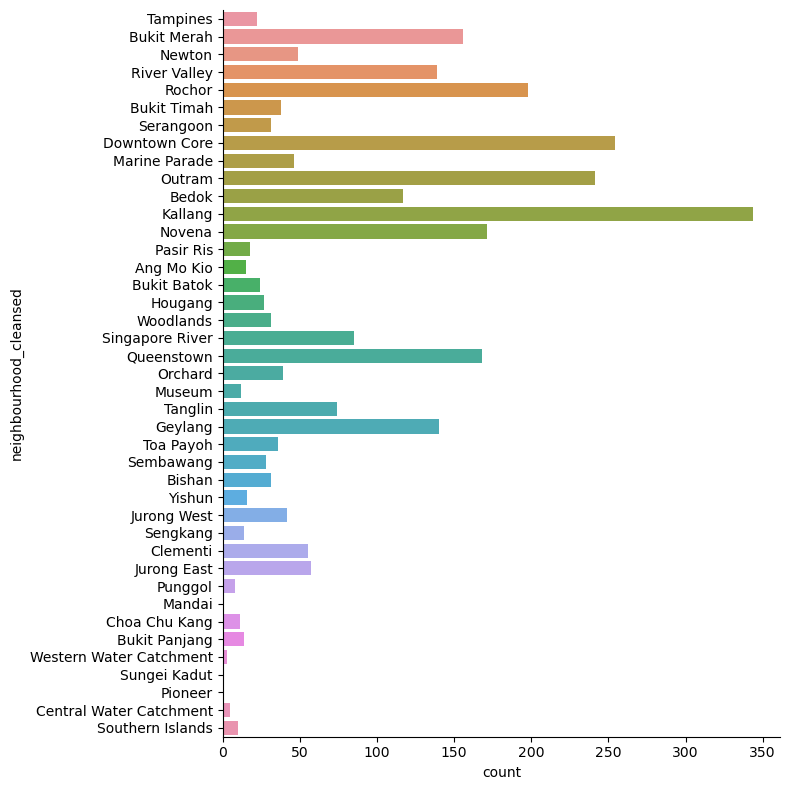

In [28]:
import seaborn as sb
ms = sb.catplot(y = "neighbourhood_cleansed", data = orig_df, kind = "count", height = 8)

##### From the visualization above, we can see that predicting the price based specific location might not give the accurate results as the data is not balanced. The data is biased as the model might not be able to predict the sale price of those locations that have insufficient data. 

In [29]:
map = folium.Map(location=[df.iloc[0]['latitude'],df.iloc[0]['longitude']], 
                 zoom_start=14, control_scale=True)

#Loop through each row in the dataframe
for i,row in df.iterrows():
    #Setup the content of the popup
    iframe = folium.IFrame('Price:' + str(row["price"]))
    
    #Initialise the popup using the iframe
    popup = folium.Popup(iframe, min_width=80, max_width=80)
    
    #Add each row to the map
    folium.Marker(location=[row['latitude'],row['longitude']],
                  popup = popup).add_to(map)

In [30]:
import json
folium.Choropleth(
             geo_data = 'data/neighbourhoods.geojson',
             data=orig_df, # my dataset
             columns=['neighbourhood_cleansed', 'price'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.neighbourhood', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='SALE PRICE').add_to(map1)


In [31]:
map1

### Price Heatmap

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


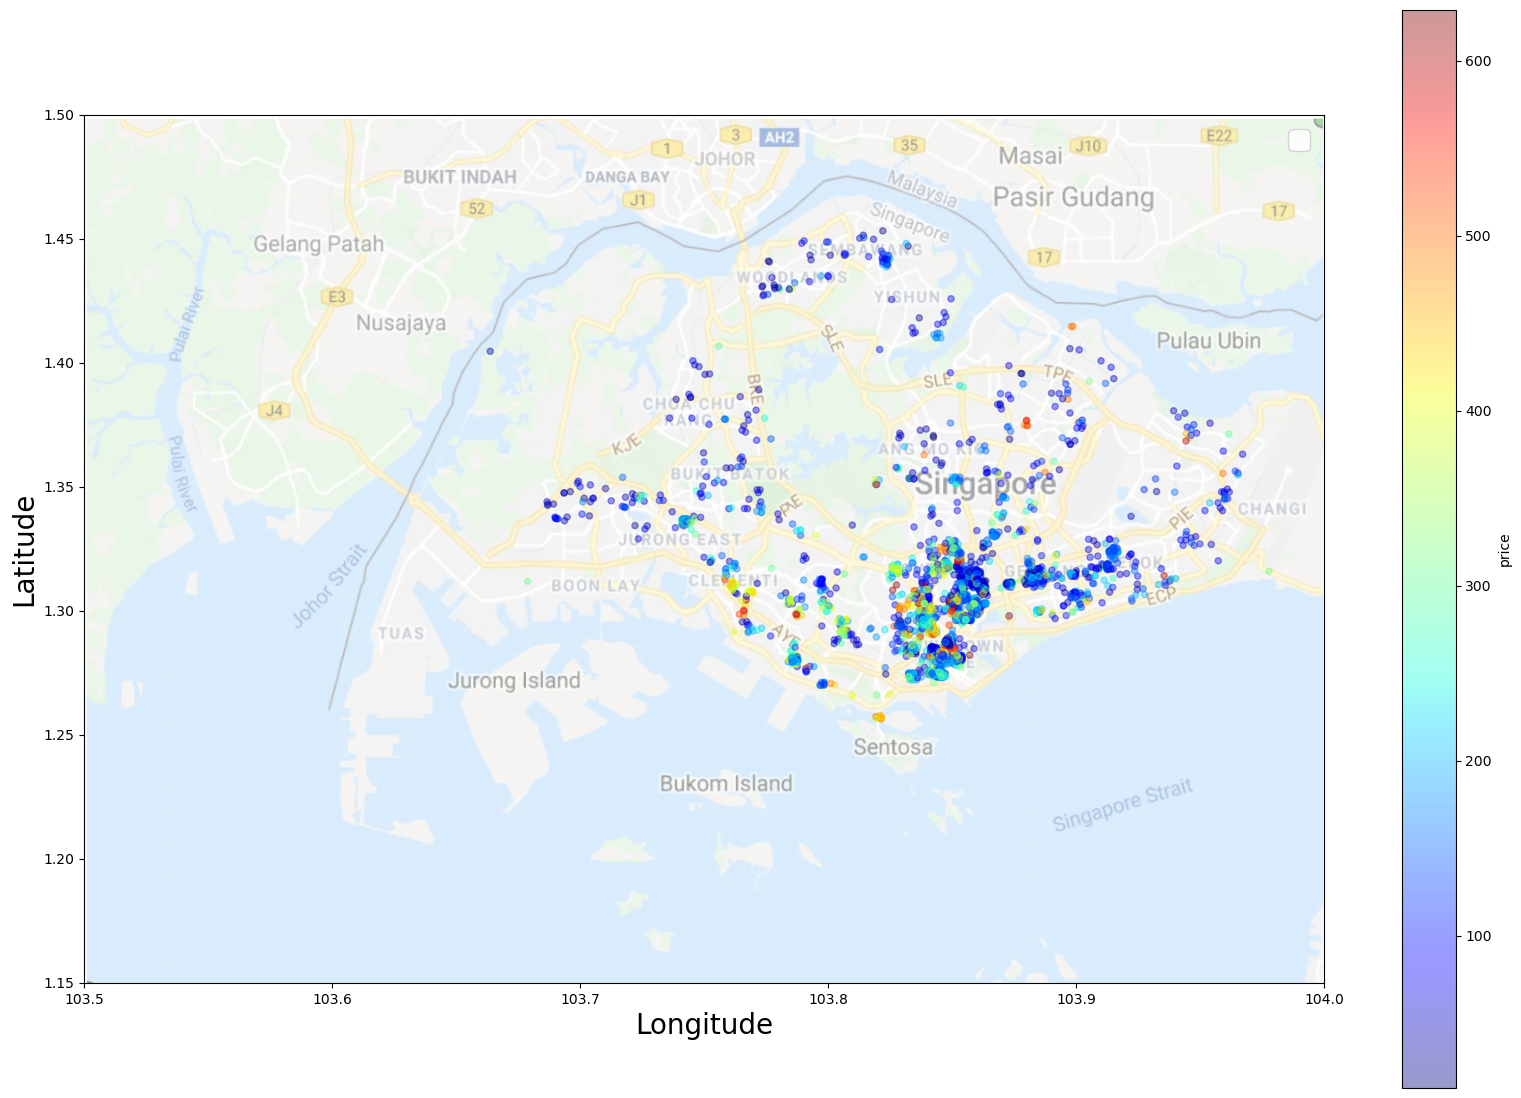

In [32]:
import matplotlib.image as mpimg
# import our image 
singapore_img = mpimg.imread('Singapore_map.png')
# plot the data
ax = df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c="price", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()

##### From the visualization shown above, we can see the price of these rental places are all spread out which can be split into many regions depends on the price. It is hard to find any relationship based on the heatmap map and visualization map. 

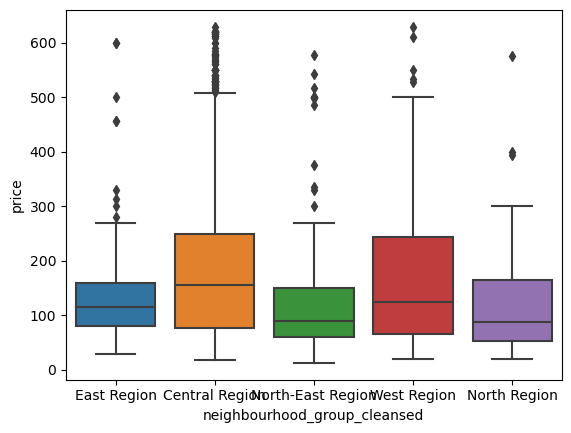

In [33]:
sb.boxplot(x="neighbourhood_group_cleansed", y="price", data=orig_df)
plt.show()

##### Since we do not have enough data for each specific location, we have to further split the data e.g. splitting into regions such as North, South, East and West of Singapore. However using these 4 regions to predict the sale price might not be effective as there are many outliers which we cannot see any relationship or correlation. And hence we have decided to make use of unsupervised learning: K mean clustering to help us to find out the clusters of regions using the spatial data: Longitude and Latitude, with also price. By using K mean clustering, it will allow us to find out the distinct groups using longitude,latitude and price

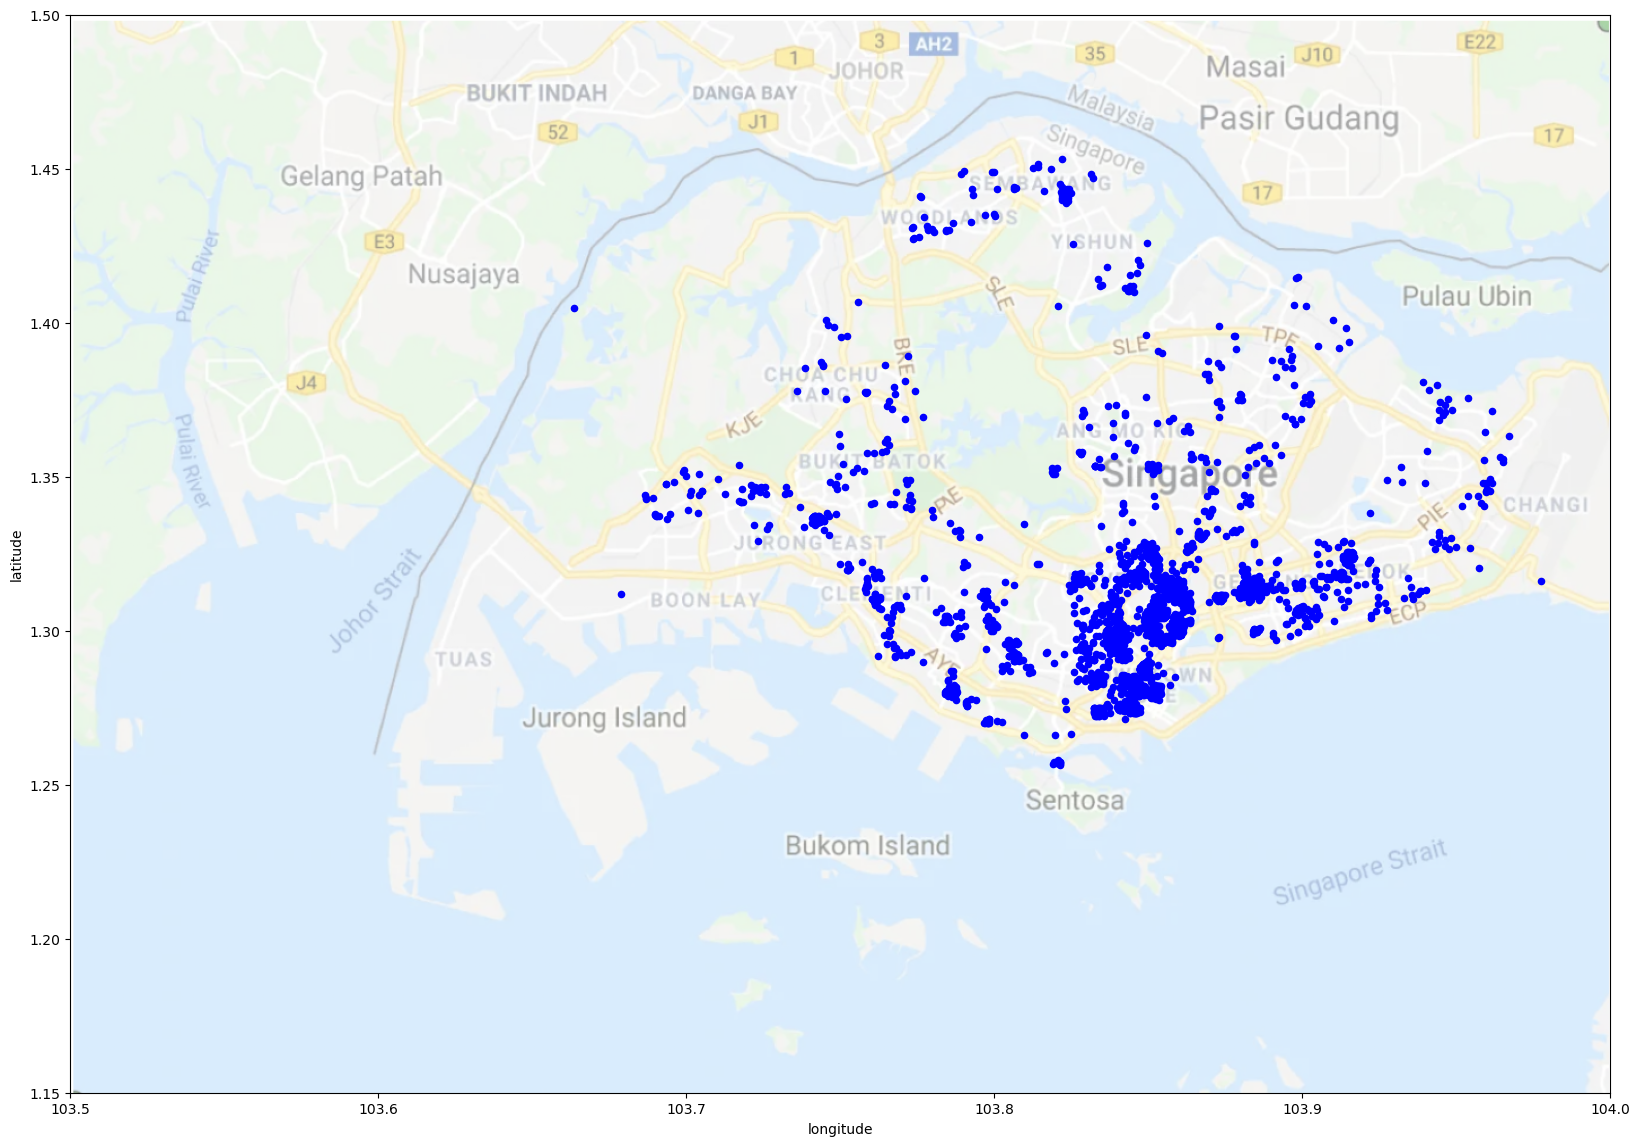

In [34]:
import matplotlib.image as mpimg
singapore_img = mpimg.imread('Singapore_map.png')

ShowMap = df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c="blue"
)
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)   
plt.show()

In [35]:
# create np array for data points
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Need to scale the data
points = orig_df[['longitude', 'latitude','price']].to_numpy()
scaled_df = StandardScaler().fit_transform(points)

In [36]:
scaled_df

array([[ 2.76991683,  1.13843378, -0.74399141],
       [ 2.80357937,  1.06896947, -0.74399141],
       [-0.82012202, -0.64925961, -0.96312285],
       ...,
       [ 0.10750618, -0.73442035,  0.04941552],
       [ 1.67648508,  0.56299848, -0.7288789 ],
       [-0.50622106, -1.67447606,  1.92336712]])

##### Here we use the elbow method to determine the number of clusters for the k mean clustering to find the distinct groups. Since k mean clustering does not help us determine the distinct groups. Based on the elbow function results, I have decided to choose to split the groups into 5 as there is a elbow change (sharp change), which is the point after which the distortion/inertia starting to decrease. The optimal number of clusters is 5

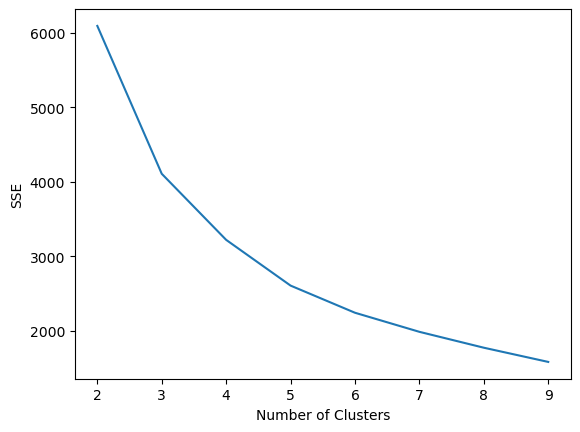

In [37]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(2, 10), sse)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [38]:
from sklearn.cluster import KMeans


# Create kmeans object
kmeans = KMeans(n_clusters=5)
# Fit kmeans object to data
kmeans.fit(points)
# print location of clusters learn by keams object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(scaled_df)

[[103.84623503   1.31005587 159.11825193]
 [103.83067481   1.29949086 374.59363958]
 [103.84608391   1.31837217  65.54373309]
 [103.83679886   1.30376573 512.90963855]
 [103.83806282   1.30411365 251.90137615]]


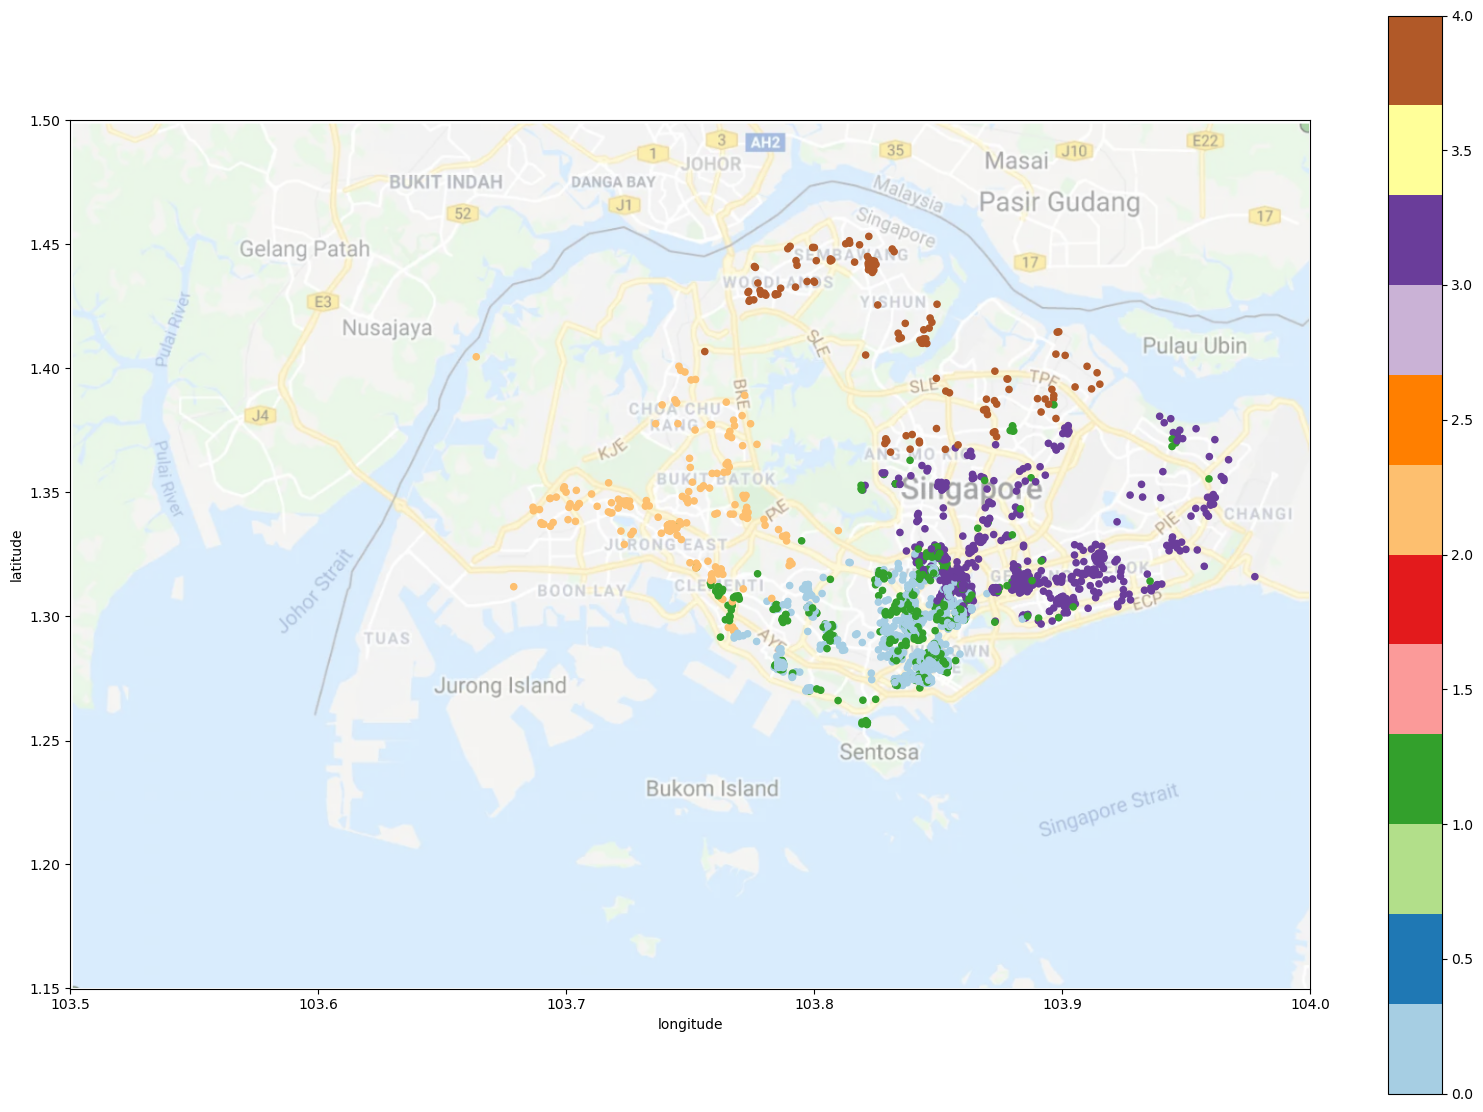

In [39]:
ShowMap = df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c=y_km,
    cmap = "Paired"
)
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5) 
plt.show()

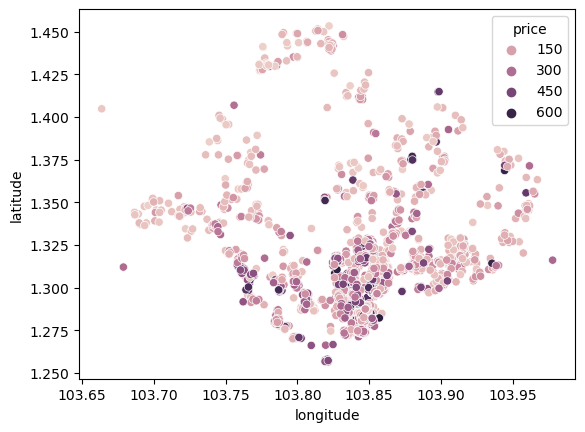

In [40]:
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'price')
plt.show()

##### Based on the K mean clustering results, where the green cluster and blue cluster are mixed. However, the cluster between the data are seem to be accurate as based on the graph above, we can see the prices are mixed up at longitude 103 and latitude 1.300. This actually shows that the k mean clustering managed to distinct those regions based on the price 

##### Using these 5 distinct region groups, we can create a new feature columns called distanceCluster that will replace the locations in Singapore. which will help us reduce columns from 130 to 84.

In [41]:
kmeans.labels_
df['distanceCluster'] = kmeans.labels_

##### By plotting a box plot, we can also see that there are very less outliers based on the distinct clusters we have created.

<AxesSubplot:xlabel='distanceCluster', ylabel='price'>

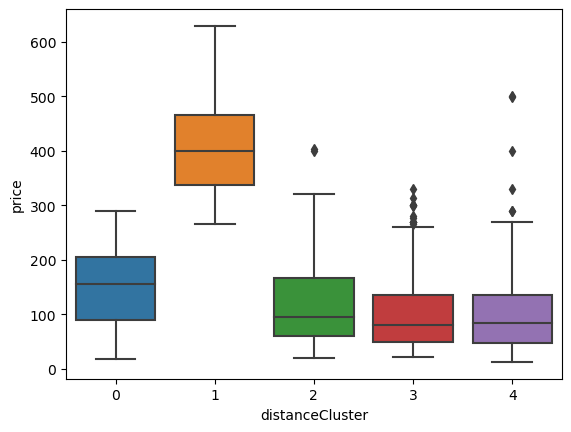

In [42]:
sb.boxplot(x="distanceCluster", y="price", data=df)

##### We can now drop those neighbourhood_cleansed groups columns which will help us to reduce 84 columns

In [43]:
df = df[df.columns.drop(list(df.filter(regex='neighbourhood_cleansed_')))]

In [44]:
df = df[df.columns.drop(list(df.filter(regex='neighbourhood_group_cleansed_')))]

### Show the Coefficient Matrix between variables

In [45]:
df_beforeclean = pd.read_csv('data/listings.csv')


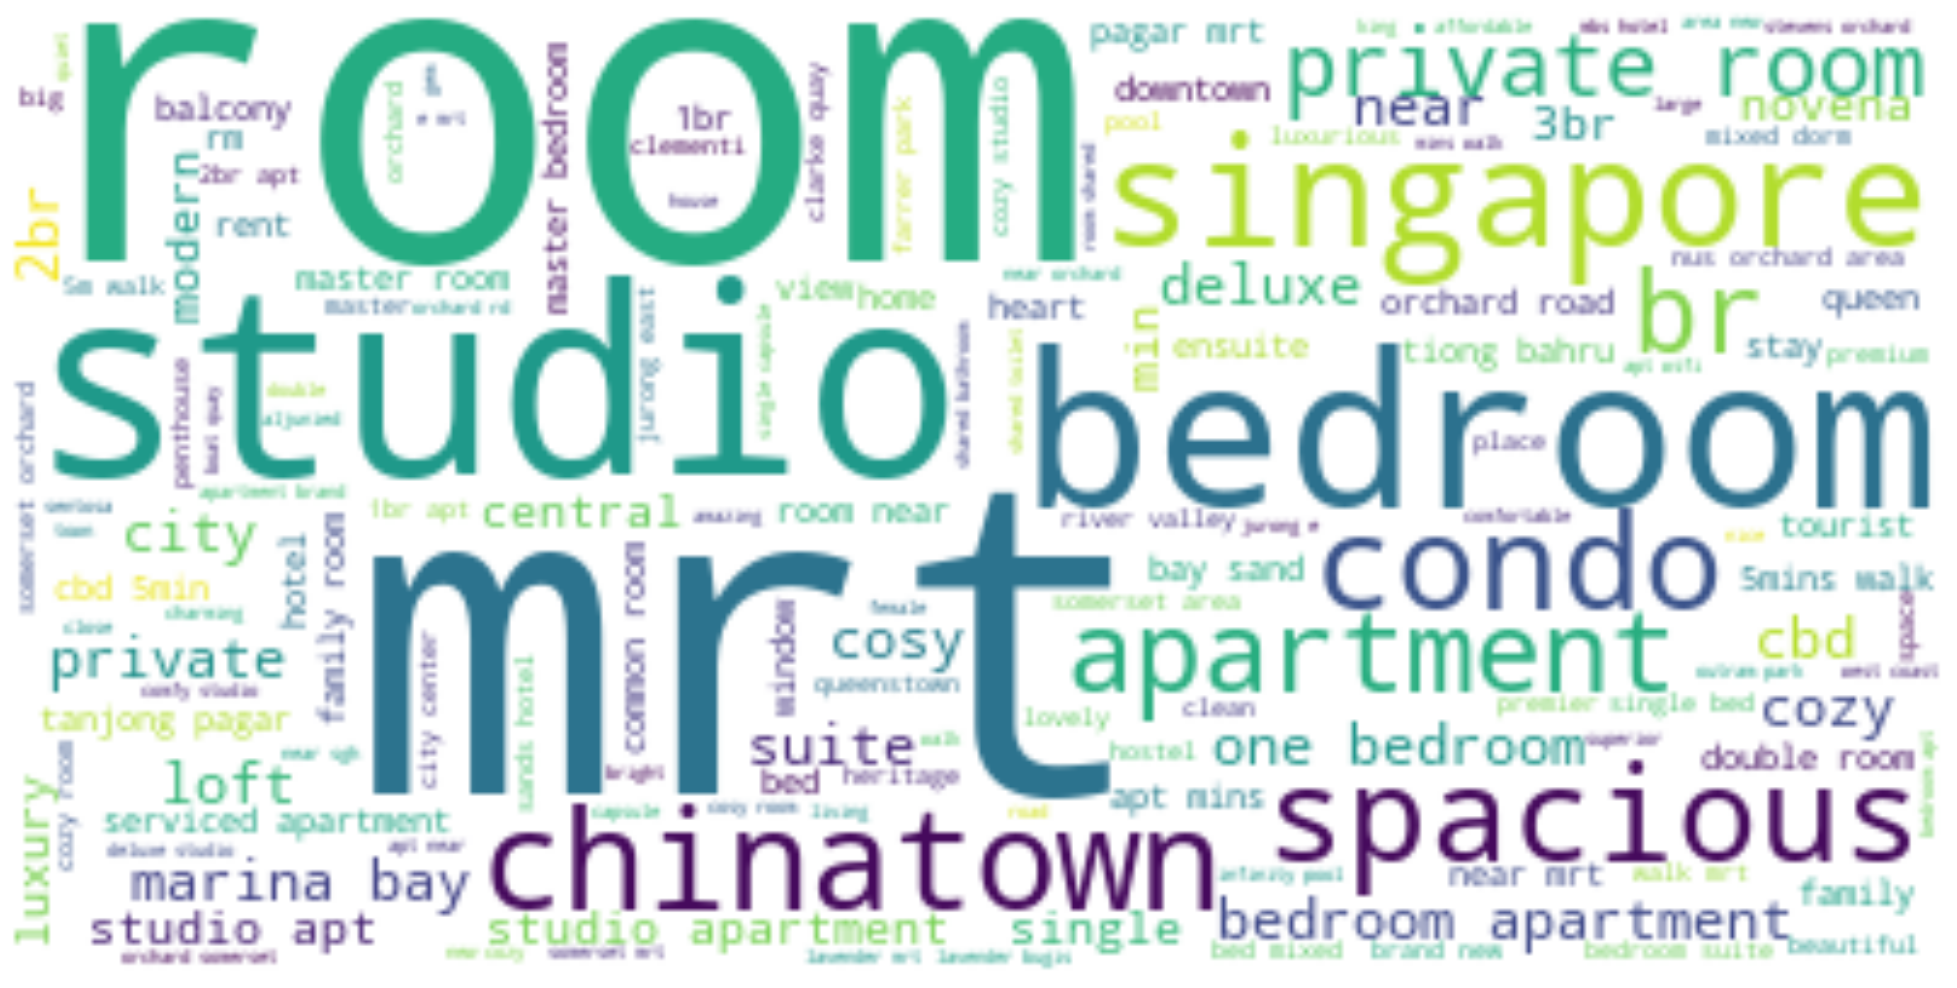

In [46]:
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n).lower() for n in df_beforeclean.name)
#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))
#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
df_showHalfFeatures= df.iloc[:,2:43]
df_remainingFeatures = df.iloc[:,44:]
df_remainingFeatures['price'] = df['price']

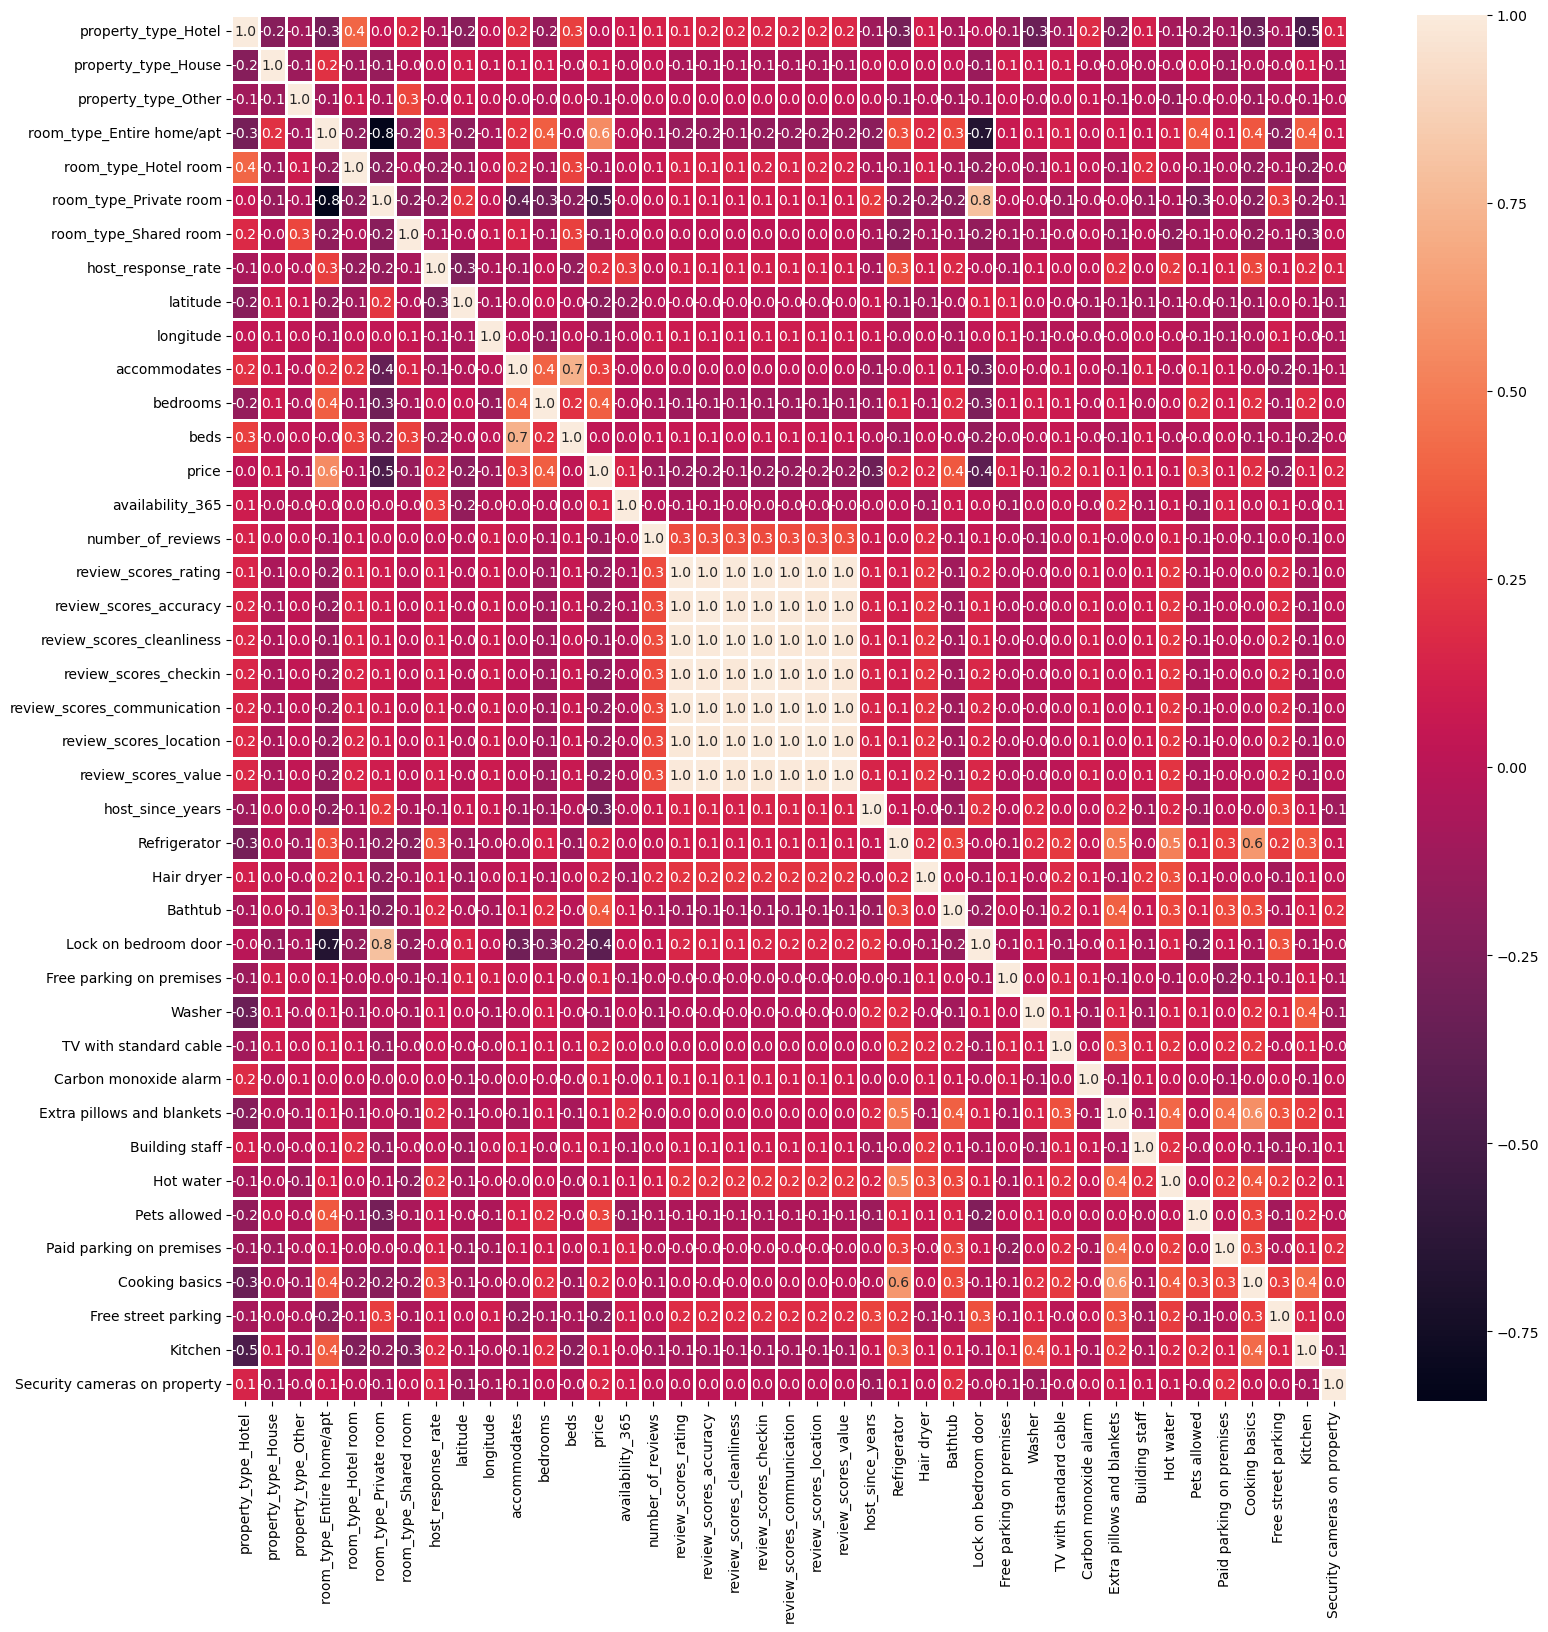

In [48]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_showHalfFeatures.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

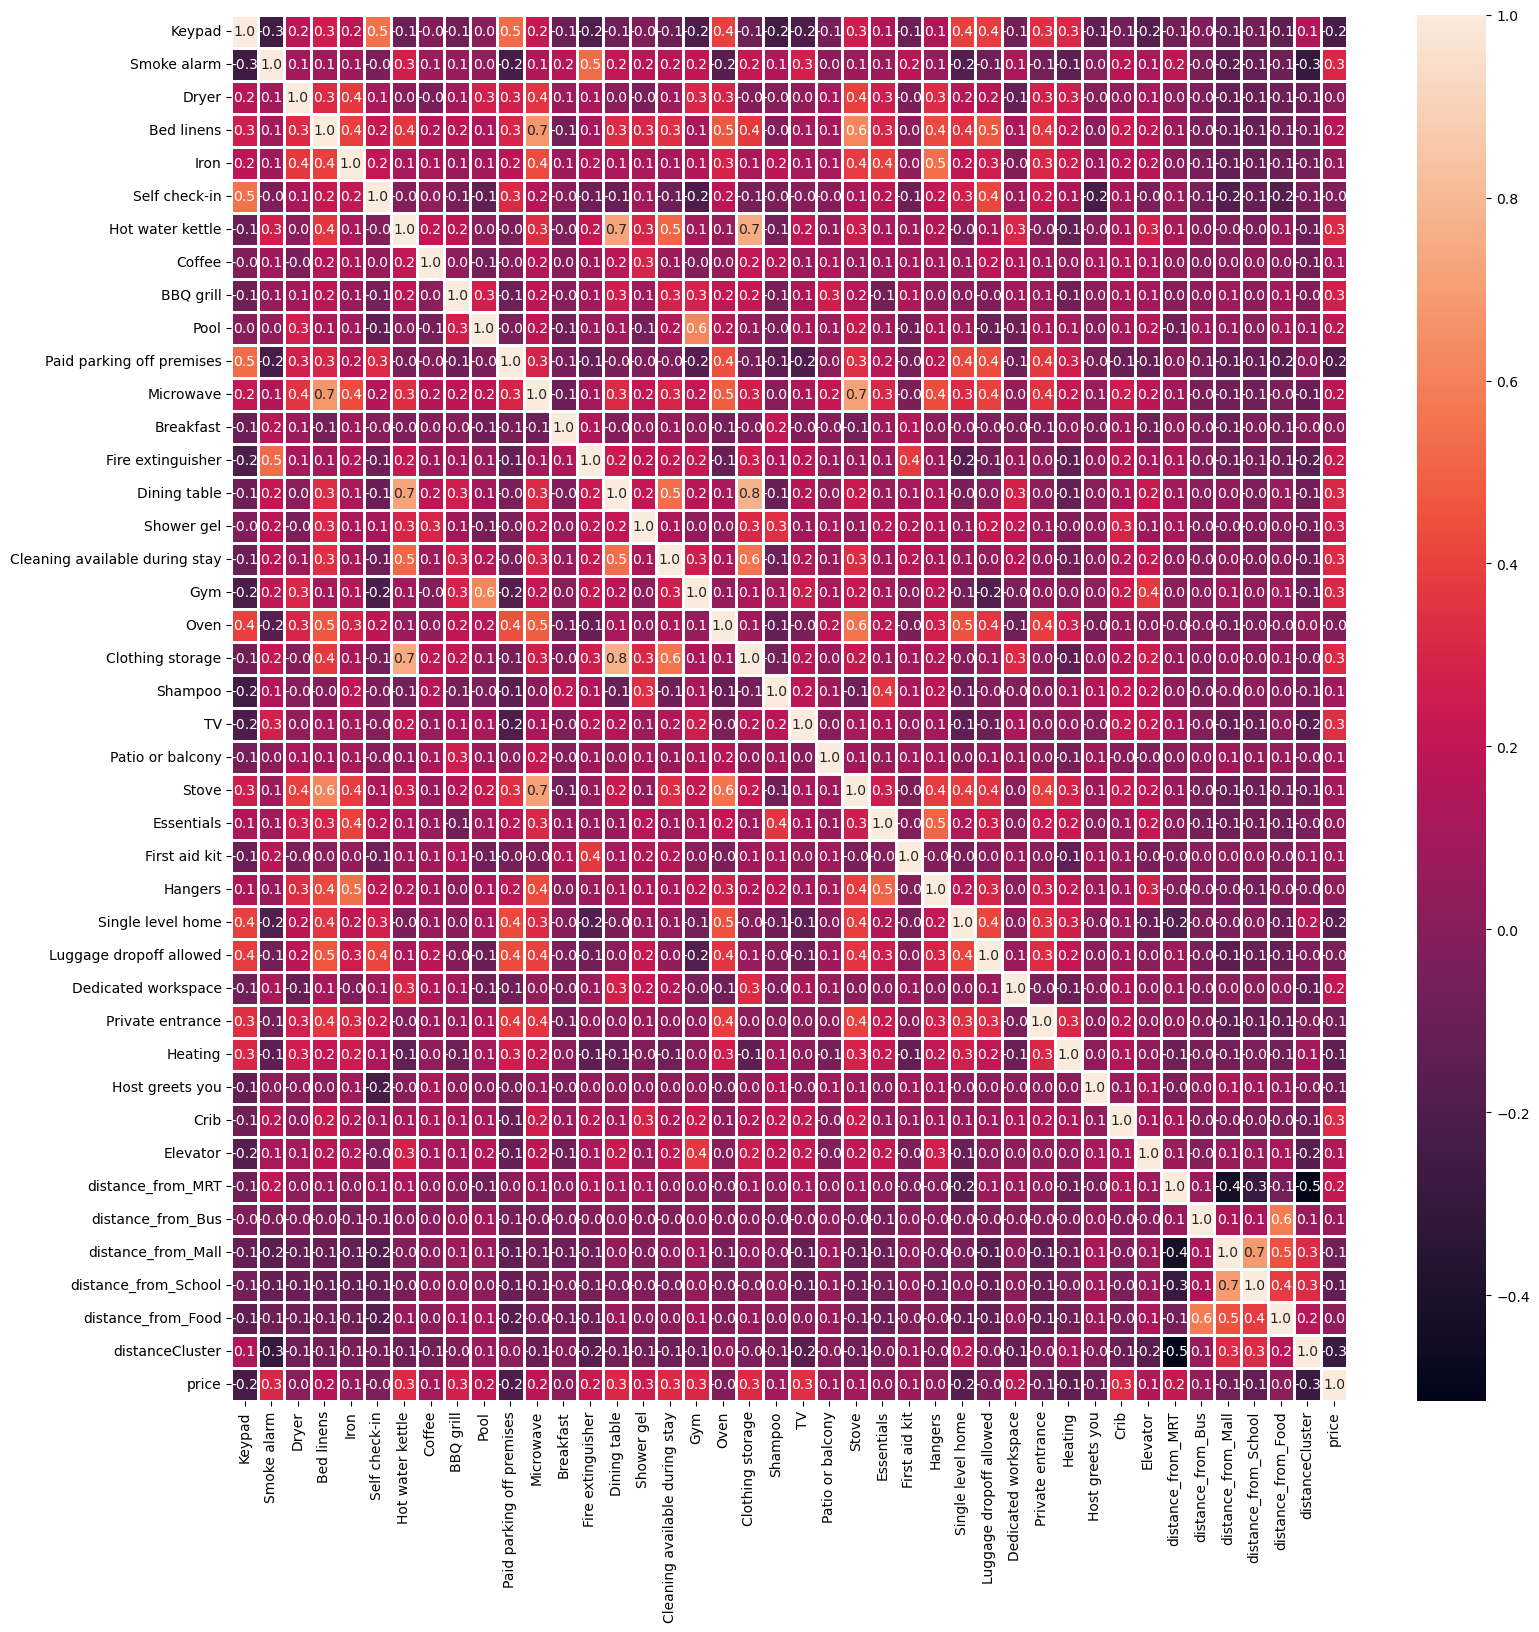

In [49]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_remainingFeatures.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Based on this correlation map, The different kinds of ammenities that the owners provide, might be one factor that will affect the sales price as most of the ammenities have correlation with price

### Based on the correlation map, we can see that the Room_type might be able to predict the sale price as there is negative correlation for private room and positive correlation for Entire home/apt. 

In [ ]:
#d1= df[['host_response_rate','bedrooms','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
#d3 = df[['room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room','distance_from_MRT']]
#result = pd.concat([d1, df_showAmmenities,d3], axis=1, join='inner')
#pd.set_option('display.max_columns',None)
#X.head()

In [28]:
df.columns

Index(['Unnamed: 0', 'property_type_Apartment', 'property_type_Hotel',
       'property_type_House', 'property_type_Other',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'host_response_rate',
       'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'host_since_years',
       'Private entrance', 'Single level home', 'Building staff', 'Coffee',
       'Oven', 'Carbon monoxide alarm', 'Gym',
       'Cleaning available during stay', 'First aid kit', 'Hot water kettle',
       'Hair dryer', 'Elevator', 'Security cameras on property', 'Hot water',
       'Lock on bedroom door', 'Paid parking on premises',
       'Dedicated workspace', 'Free parking on p

In [51]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.to_csv('data/clean_listing.csv')